To do
- Look into saving/loading data using Parquet
- ~~Add column for track/shower expectation~~
- Write code to drop certain columns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as st
from utils import column_renamer, pdgid_converter, is_shower, count_occurrences, count_outliers

IndentationError: expected an indented block after 'for' statement on line 58 (utils.py, line 59)

In [ ]:
filenames = ["neutrino11x.h5", "neutrino12x.h5", "neutrino13x.h5"]
filepaths = [os.path.join("data", filename) for filename in filenames]

df_list = []
for filepath in filepaths:
    df_list.append(pd.read_hdf(filepath))
dataframe = pd.concat(df_list)

dataframe.rename(column_renamer, axis="columns", inplace=True)
dataframe["Particle name"] = dataframe.apply(lambda row: pdgid_converter(row["pdgid"]), axis=1)
dataframe["Is shower?"] = dataframe.apply(is_shower, axis=1)

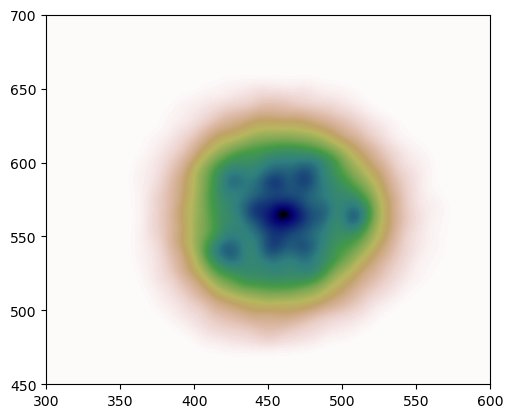

In [ ]:
plot_density(df_muon, gridsize=200, datapoint_count=100000)

C:\Users\timho\AppData\Local\Temp\ipykernel_19152\2924348719.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


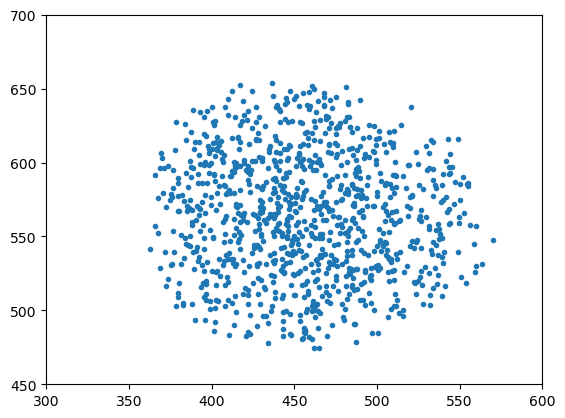

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(dataframe["Track x-position"], dataframe["Track y-position"], marker=".")
ax.axis(xmin = 300, xmax = 600, ymin= 450, ymax = 700)
fig.show()

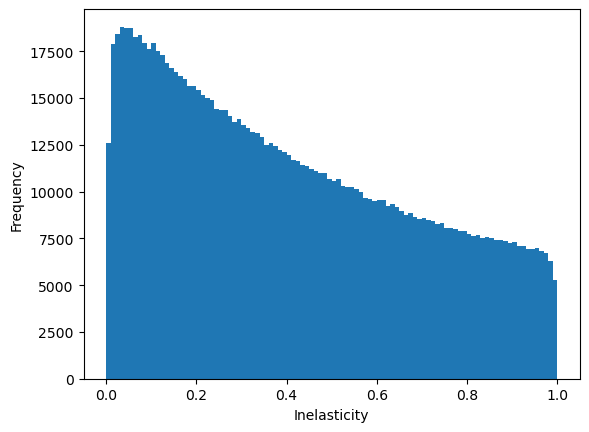

In [ ]:
dataframe['Inelasticity'].plot.hist(bins=100, xlabel='Inelasticity')
plt.show()

In [ ]:
dataframe[['Inelasticity','Particle name']].plot.hist(by='Particle name',bins=100,figsize=(10, 15))
pass
#plt.show()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
ax1 = dataframe[['Track x-position','Track y-position', 'Track z-position']].plot.hist(bins=100, xlabel='position')
ax2 =dataframe[['Shower x-position','Shower y-position', 'Shower z-position']].plot.hist(bins=100, xlabel='position')
plt.show()

NameError: name 'dataframe' is not defined

In [ ]:
column_name = 'Shower x-position'
cutoff      = 1e3
count_outliers(cutoff,column_name,dataframe)